<p>
Prepared by Vytautas Bielinskas. 2020. <br>
Download data from: https://finance.yahoo.com/quote/GOOG/history/
</p>

<h2>PART 1. Data Pre-processing</h2>

<h3>Step #0. Fire the system</h3>

In [1]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import plotly.graph_objects as go # for visualization
import os
import sys 
sys.path.append("../Function/")
import function
from function import remove_high_corr,remove_outliers,plot_line,plot_residuals

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

<h3>Step #1. Read data</h3>

In [11]:
# Importing Training Set
df = pd.read_excel('../../site_info_ver_4_lite.xlsx')

In [16]:
print(len(df),len(df.loc[df['Israelis_Count']>4000]))
str(round(len(df.loc[df['Israelis_Count']>4000])/len(df)*100,1))+'%'

108525 2342


'2.2%'

Index(['Date', 'Site_Name', 'Israelis_Count', 'Tourists_Count', 'Total',
       'region_Central', 'region_Judea_Samaria', 'region_North',
       'region_South', 'is_weekend', 'operations', 'is_jewish_holiday',
       'is_jewish_vacation', 'is_muslims_holiday', 'is_muslims_vacation',
       'is_camping', 'special_activity', 'visit_duration', 'is_jewishHeritage',
       'is_muslimsHeritage', 'is_christiansHeritage', 'is_nationalPark',
       'is_natureReserve', 'is_archaeology', 'is_religion', 'is_animals',
       'is_heritage', 'is_water', 'is_cave', 'is_lookout', 'pm10', 'pm2.5',
       'nox', 'so2', 'Temperature', 'is_HeatWave', 'Tel_Aviv-Yafo_pm10',
       'Jerusalem_pm10', 'Haifa_pm10', 'Ashkelon_pm10', 'Beer-Sheva_pm10',
       'Tel_Aviv-Yafo_pm2.5', 'Jerusalem_pm2.5', 'Haifa_pm2.5',
       'Ashkelon_pm2.5', 'Beer-Sheva_pm2.5', 'Tel_Aviv-Yafo_nox',
       'Jerusalem_nox', 'Haifa_nox', 'Ashkelon_nox', 'Beer-Sheva_nox',
       'Tel_Aviv-Yafo_so2', 'Jerusalem_so2', 'Haifa_so2', 'Ashke

,Israelis_Count,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,...,month,year,_Eilat Coral Beach,_En Afek,_En Gedi,_En Prat,_Enot Tsukim,_Gan HaShlosha,_Hermon Stream (Banias),_The Masada
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,35,0,0,0,1,1,0,0,0,0,...,1,2016,1,0,0,0,0,0,0,0
2016-01-01,20,0,1,0,0,1,0,0,0,0,...,1,2016,0,0,0,1,0,0,0,0
2016-01-01,5,0,0,1,0,1,0,0,0,0,...,1,2016,0,1,0,0,0,0,0,0
2016-01-01,22,0,1,0,0,1,0,0,0,0,...,1,2016,0,0,0,0,1,0,0,0
2016-01-01,71,0,0,1,0,1,0,0,0,0,...,1,2016,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,1077,0,0,1,0,0,0,0,1,0,...,8,2021,0,0,0,0,0,0,1,0
2021-08-11,508,0,0,0,1,0,0,0,1,0,...,8,2021,0,0,0,0,0,0,0,1
2021-08-11,739,0,1,0,0,0,0,0,1,0,...,8,2021,0,0,0,1,0,0,0,0


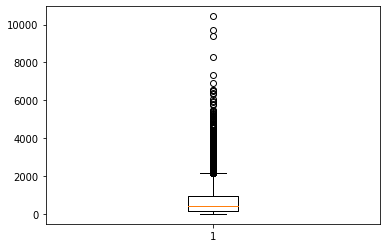

In [3]:
print(df.columns)
# dataset = df[df.Site_Name==df.Site_Name.unique()[1]]
dataset = df.copy()
# site_name=df.Site_Name.unique()[1]
# dataset_train.set_index("Date",inplace=True)
dataset.head(1)
dataset[['so2','nox','pm10','pm2.5']].isna().sum()
dataset.drop(['so2','nox','pm10','pm2.5'],axis=1,inplace=True)
dataset.drop(['Tourists_Count','Total'],axis=1,inplace=True)

dataset = function.split_date(dataset)
dataset.set_index('Date',inplace=True)

dataset = pd.get_dummies(dataset,'')
dataset = function.remove_outliers(dataset, 'Israelis_Count')
dataset.sort_index(inplace=True)
dataset

In [4]:
# size=round(len(dataset)*.8)
# dataset_train = dataset[:size]
# dataset_test = dataset[size:]
X = dataset.drop(['Israelis_Count'],axis=1)
y = dataset.Israelis_Count

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size=0.3,random_state=312148513)

from sklearn.preprocessing import MinMaxScaler 
train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
train_scaler_y = MinMaxScaler()
test_scaler_y = MinMaxScaler()

X_train_scaled = train_scaler.fit_transform(X_train)
y_train_scaled = np.log([y_train.values+0.01]).T
y_train_scaled = np.reshape(y_train_scaled, y_train_scaled.shape[0])

X_test_scaled = test_scaler.fit_transform(X_test)
y_test_scaled = np.log([y_test.values+0.01]).T
y_test_scaled = np.reshape(y_test_scaled, y_test_scaled.shape[0])

print('shape X train',X_train_scaled.shape)
print('shape y train',y_train_scaled.shape)
print('shape X test',X_test_scaled.shape)
print('shape y test',y_test_scaled.shape)

shape X train (6923, 88)
shape y train (6923,)
shape X test (2967, 88)
shape y test (2967,)


In [5]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# from keras.optimizers import ADAM

In [10]:
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Initializing the Neural Network based on LSTM
model = Sequential()

model.add(Dense(units=128,activation='tanh',input_shape=(X_train_scaled.shape[1],)))
# Adding Dropout
model.add(Dropout(0.25))
model.add(Dense(units=64,activation='relu'))
# Adding Dropout
model.add(Dropout(0.25))
model.add(Dense(units=64,activation='relu'))
# Adding Dropout
model.add(Dropout(0.25))
model.add(Dense(units=32,activation='relu'))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1,activation='relu'))

# Compiling the Neural Network
model.compile(optimizer = 'adam', loss='mean_squared_error',metrics=['mean_squared_error'])

<h3>Step #4. Start training</h3>

In [11]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train_scaled, y_train_scaled, shuffle=True, epochs=1000, callbacks=[es, rlr, mcp, tb],validation_split=0.2,batch_size=5)

Epoch 1/1000
1091/1108 [============================>.] - ETA: 0s - loss: 3.4475 - mean_squared_error: 3.4475
Epoch 00001: val_loss improved from inf to 0.82007, saving model to weights.h5
1108/1108 [==============================] - 3s 2ms/step - loss: 3.4329 - mean_squared_error: 3.4329 - val_loss: 0.8201 - val_mean_squared_error: 0.8201 - lr: 0.0010
Epoch 2/1000
1094/1108 [============================>.] - ETA: 0s - loss: 1.9496 - mean_squared_error: 1.9496
Epoch 00002: val_loss did not improve from 0.82007
1108/1108 [==============================] - 2s 2ms/step - loss: 1.9455 - mean_squared_error: 1.9455 - val_loss: 1.7590 - val_mean_squared_error: 1.7590 - lr: 0.0010
Epoch 3/1000
1101/1108 [============================>.] - ETA: 0s - loss: 1.6185 - mean_squared_error: 1.6185
Epoch 00003: val_loss did not improve from 0.82007
1108/1108 [==============================] - 2s 2ms/step - loss: 1.6174 - mean_squared_error: 1.6174 - val_loss: 0.8271 - val_mean_squared_error: 0.8271 - lr

In [12]:
prediction_scaled = model.predict(X_test_scaled)
prediction_scaled = np.reshape(prediction_scaled,prediction_scaled.shape[0])
prediction = np.exp([prediction_scaled]).T
prediction = np.reshape(prediction,prediction.shape[0])
print(prediction.shape)
res  = pd.DataFrame(data={
    'Prediction':prediction,
    'Actual':y_test.values} , index=y_test.index
    )


title='Genaral,NN'
print('rmse',function.get_rmse(res.Prediction, res.Actual))
print('std',np.std(res.Actual))
res.sort_index(inplace=True)
function.plot_line(res.Prediction, res.Actual,alpha_actual=0.5,alpha_prediction=1,fig_size_tuple=(40,10),title=title)
function.plot_residuals(res.Prediction, res.Actual,title=title)


(2967,)
